# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [23]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Your Code Here

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [5]:
fitbit_data=pd.read_csv('../data/Fitbit2.csv')

fitbit_data.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [7]:
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fitbit_data['Month_Name'] = fitbit_data['Months_encoded'].apply(lambda x: month_names[x-1])

In [8]:
fitbit_data['Day_Type'] = fitbit_data['Work_or_Weekend'].apply(lambda x: 'Weekend' if x == 0 else 'Workday')

In [9]:
steps_by_month_daytype = fitbit_data.groupby(['Month_Name', 'Day_Type'])['Steps'].median().unstack()

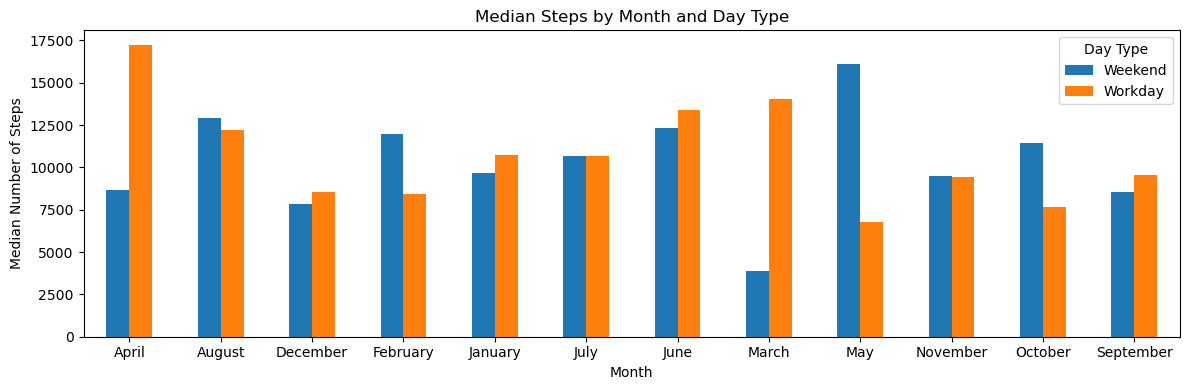

In [10]:
fig, ax = plt.subplots(figsize=(12, 4))
plt.sca(ax)
steps_by_month_daytype.plot(kind='bar', ax=ax)
plt.xticks(rotation=0)
plt.xlabel('Month')
plt.ylabel('Median Number of Steps')
plt.title('Median Steps by Month and Day Type')
plt.legend(title='Day Type')
plt.tight_layout()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [11]:
features = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']

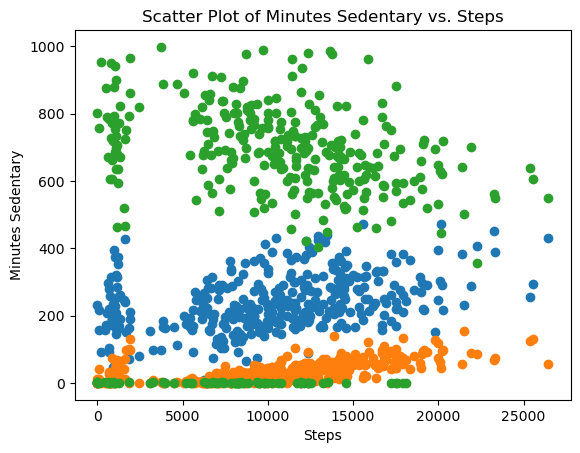

In [14]:
for feat in features:

    plt.scatter(fitbit_data['Steps'], fitbit_data[feat])

    plt.xlabel('Steps')

    plt.ylabel(feat)

    plt.title('Scatter Plot of {} vs. Steps'.format(feat))

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [15]:
titanic=pd.read_csv('../data/titanic.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [18]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [21]:
# NUMERICAL VARIABLES
numerical_vars = titanic.select_dtypes(include=['int64', 'float64']).columns.to_list()
numerical_vars

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [22]:
# CATEGORICAL VARIABLES
categorical_vars = titanic.select_dtypes(include=['object', 'bool']).columns.to_list()
categorical_vars

['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked']

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [25]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

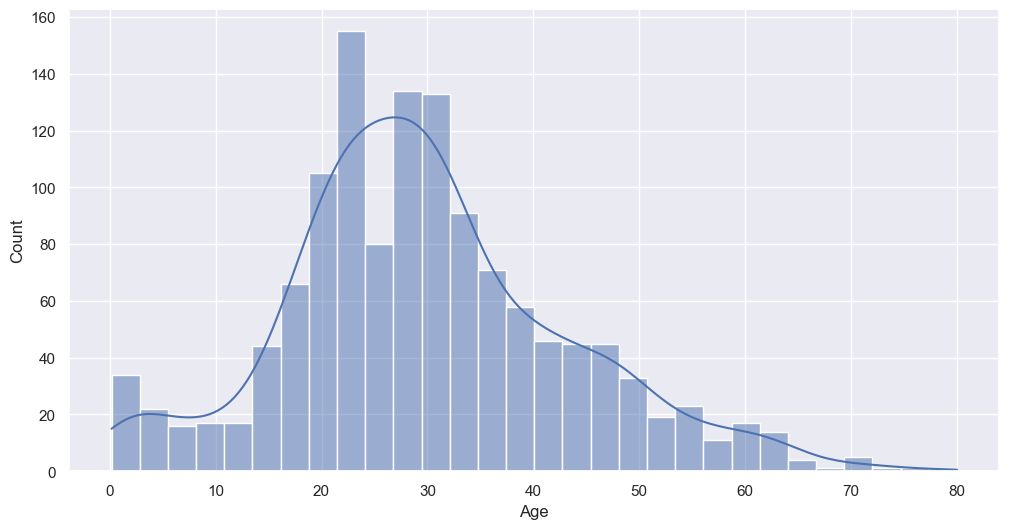

In [27]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(12,6)})
sns.histplot(data=titanic, x='Age', kde=True)

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

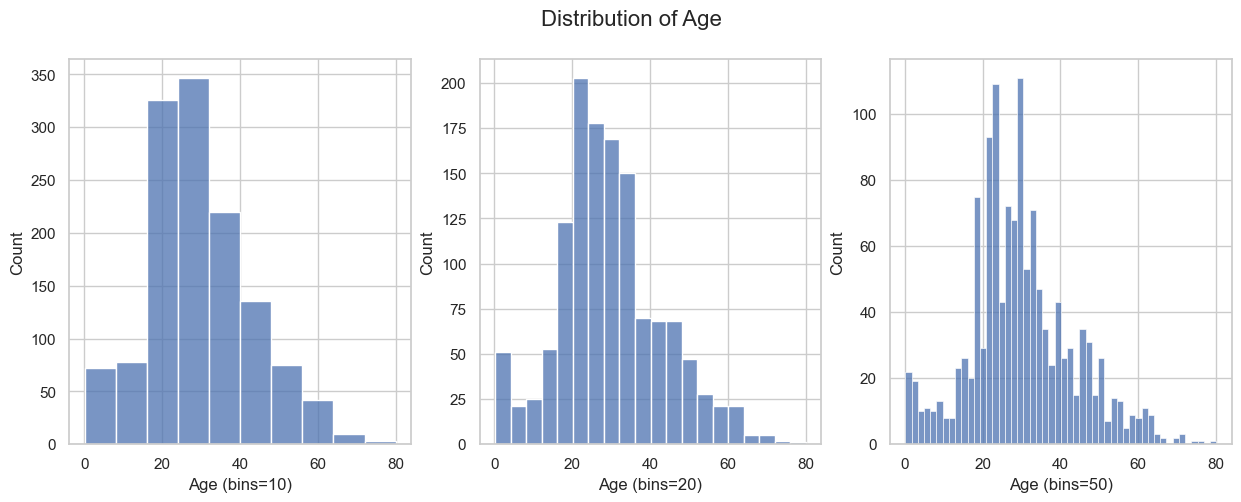

In [32]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(ax=axes[0], data=titanic, x='Age', bins=10)
axes[0].set_xlabel('Age (bins=10)')
sns.histplot(ax=axes[1], data=titanic, x='Age', bins=20)
axes[1].set_xlabel('Age (bins=20)')

sns.histplot(ax=axes[2], data=titanic, x='Age', bins=50)
axes[2].set_xlabel('Age (bins=50)')
plt.suptitle('Distribution of Age', fontsize=16)
plt.show()

Text(0.5, 25.0, 'Age (bins=50)')

<Figure size 1200x600 with 0 Axes>

#### How does the bin size affect your plot?

In [33]:
"""
las brechas  son mas o menos delgadas y mientras mayoir es el bin, los datos son menos legibles.
"""

'\nlas brechas  son mas o menos delgadas y mientras mayoir es el bin, los datos son menos legibles.\n'

#### Use seaborn to show the distribution of column `Age`.

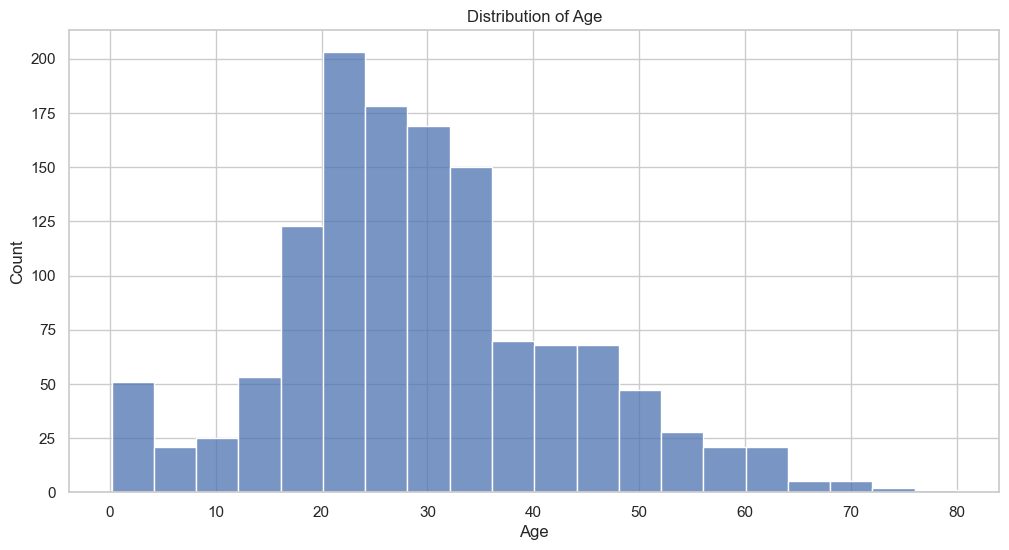

In [34]:
sns.set_style("whitegrid")

plt.figure(figsize=(12,6))

sns.histplot(data=titanic, x="Age", bins=20)

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")

plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

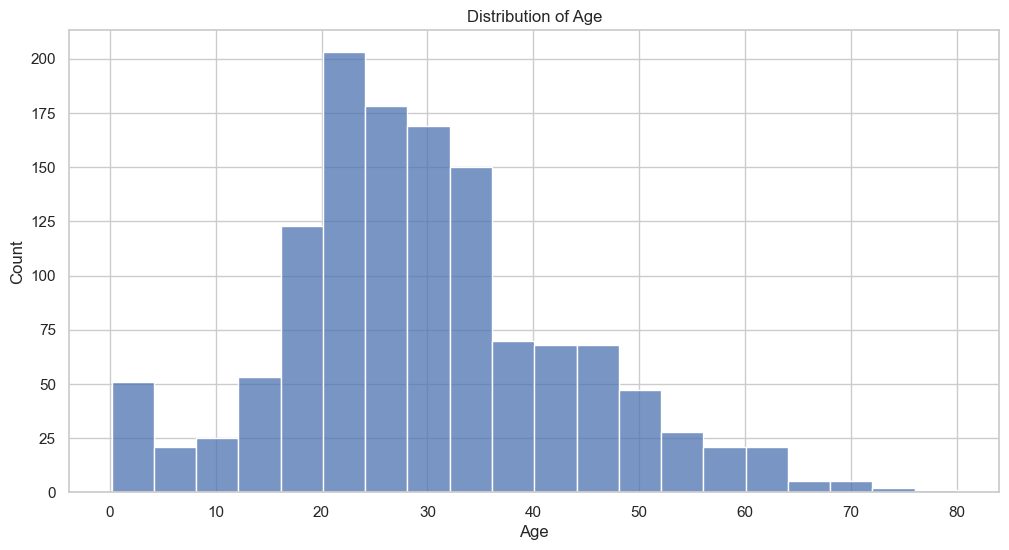

In [35]:
sns.set_style("whitegrid")

plt.figure(figsize=(12,6))

sns.histplot(data=titanic, x="Age", bins=20)

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")

plt.show()


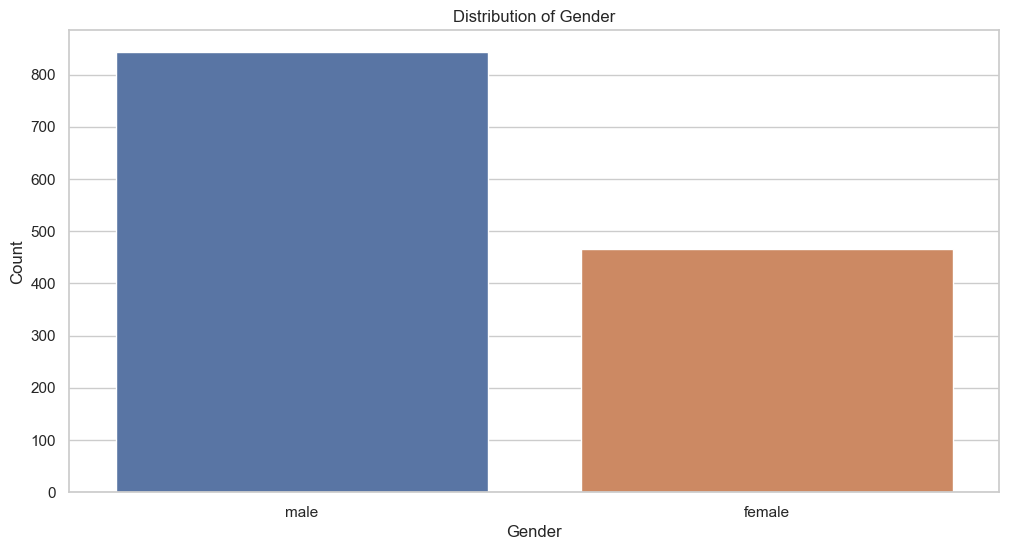

In [38]:
sns.countplot(x='Gender', data=titanic)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()


#### Use the right plot to visualize the column `Pclass`.

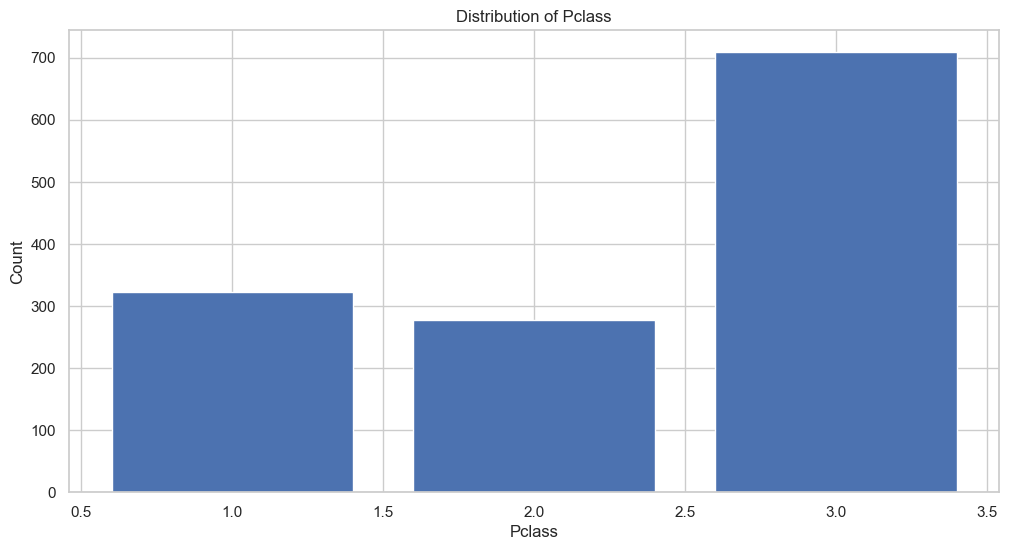

In [39]:
plt.bar(titanic['Pclass'].unique(), titanic['Pclass'].value_counts())
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Distribution of Pclass')
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Plot the correlation matrix using seaborn.

In [ ]:
# your code here

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here